In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import maxwell

import os, sys, inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 

import algorithms as a
import force_functions as f

In [2]:
np.random.seed(1)

In [19]:
t_max = 100
dt = .002
N = 64
gamma = 1.

In [20]:
def init(N, L, lattice_constant):
    
    positions = list(np.arange(-L/2., L/2., lattice_constant))
    r0 = np.array(np.meshgrid(positions, positions, positions)).T.reshape(-1,3)
    p0 = maxwell.rvs(loc=0, scale=1.5, size=(N,3)) / np.sqrt(1.5)
    
    return r0, p0

In [21]:
r0, p0 = init(N=64, L=6., lattice_constant=1.5)

In [22]:
R, P, t = a.leimkuhler_matthews_BAOAB(r0, p0, t_max, dt, f.LJ_force, gamma,
                                      periodic={'PBC': True, 'box_size': 6., 'closed': False})

100%|██████████| 49999/49999 [01:10<00:00, 711.08it/s]


In [8]:
def kinetic_energy(p):
    return .5 * np.linalg.norm(p, axis=(1,2))**2

In [9]:
def potential_energy(r, sigma=1, periodic=None):
    if periodic is None:
        periodic = {'PBC': False,
                    'box_size': 0,
                    'closed': False}

    idx = np.arange(len(r))
    pairs = np.meshgrid(idx, idx)
    separations = r[pairs[0]] - r[pairs[1]]

    if periodic['PBC']:
        separations[np.where(separations > periodic['box_size'] / 2.)] -= periodic['box_size']
        separations[np.where(separations < -periodic['box_size'] / 2.)] += periodic['box_size']

    distances = np.triu(np.linalg.norm(separations, axis=-1))

    V = (4 * np.power(sigma / distances, 12) - 4 * np.power(sigma / distances, 6))
    V[np.isnan(V)] = 0.
    V = V.sum()

    return V

In [11]:
T = kinetic_energy(P)
V = np.zeros(len(t))
for i in tqdm(range(len(t))):
    V[i] = potential_energy(R[i], periodic={'PBC': True, 'box_size': 6., 'closed': False})

  0%|          | 0/5000 [00:00<?, ?it/s]<ipython-input-9-4b4566361a9d>:17: RuntimeWarning: divide by zero encountered in true_divide
  V = (4 * np.power(sigma / distances, 12) - 4 * np.power(sigma / distances, 6))
<ipython-input-9-4b4566361a9d>:17: RuntimeWarning: invalid value encountered in subtract
  V = (4 * np.power(sigma / distances, 12) - 4 * np.power(sigma / distances, 6))
100%|██████████| 5000/5000 [00:03<00:00, 1598.13it/s]


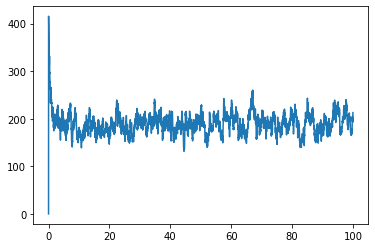

In [23]:
plt.plot(t, T)

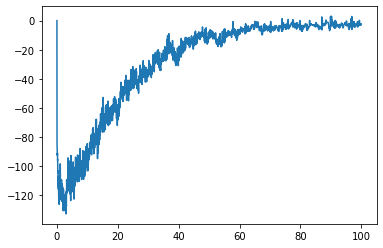

In [24]:
plt.plot(t, V)